###  Assignment 2:  Bhargavi Duggirala (UID: 005634488)

## 1 Hospital admission & quality of service

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
##reading the health_data dataset

In [2]:
df_hospital = pd.read_csv('health_data.csv')

### Question 1

In [11]:
model = smf.ols(formula = 'patient_died_dummy ~ hospital_id',
                data = df_hospital)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     patient_died_dummy   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 02 Feb 2022   Prob (F-statistic):          1.75e-220
Time:                        21:33:08   Log-Likelihood:                -7416.5
No. Observations:               24480   AIC:                         1.485e+04
Df Residuals:                   24470   BIC:                         1.493e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0970      0.006  

(a) 

In the above regression, 
<br>Intercept term: When categorical variables are added to the regression, one of the categories is removed and the effect of this is measured through intercept. This intercept term gives the effect of Hospital A. Thus for hospital A, patient_died_dummy is the intercept, 0.0970. 
<br>The rest of the coefficients of the hospital IDs are measured with respect to Hospital A. Therefore, patient_died_dummy for Hospital D is 0.0970 + 0.1882 = 0.2852.

(b) 

Difference between mortality in D and E = Difference between the respective coefficients. 
Therefore, mortality rate at Hospital D is 0.1882 + 0.0531  = 0.2413 times higher than Hospital E.

## Causal interpretation (or lack thereof)

### Question 2

In [12]:
df_hospital['hospital_id'].unique()

array(['D', 'H', 'A', 'E', 'G', 'J', 'B', 'F', 'C', 'I'], dtype=object)

In [13]:
df_hospital_AB = df_hospital[(df_hospital['hospital_id'] == 'A') | (df_hospital['hospital_id'] == 'B')] 

Regress mortality on an intercept and a dummy for whether the patient visited
hospital B.

In [14]:
model_1 = smf.ols(formula = 'patient_died_dummy ~ hospital_id',
                data = df_hospital_AB)
result = model_1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     patient_died_dummy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9377
Date:                Wed, 02 Feb 2022   Prob (F-statistic):              0.333
Time:                        21:33:14   Log-Likelihood:                -1446.8
No. Observations:                6611   AIC:                             2898.
Df Residuals:                    6609   BIC:                             2911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0970      0.005  

(a) 

Mortality rate was regressed on hospital Id in this regression. The difference in mortality rate cannot be interpreted as the causal effect. This is because many factors such as gender and age group which can influence the mortality rate are not included in the regression. There could be correlation between age group, gender with hospital. The regression can suffer from omitted variable bias without these variables which impact mortality rate.

(b) 

The omitted variables (like gender and age) effect tells us if the mortality rate between hospitals is correctly estimated or not. The difference in mortality rate is 0.0072 without these variables. This signifies that the mortality rate at Hospital B> Hospital A. BUt the addition of the ommitted variales will lead us to the actual effect.


Mortality rate by gender across both the hospitals:

In [26]:
age = df_hospital_AB[['female_dummy','patient_died_dummy']]
age = age.groupby(['female_dummy']).mean()
age = age.reset_index()
age['gender'] = age['female_dummy'].map({0:'Male',1:'Female'})
age.columns = ['female_dummy', 'Mortality Rate', 'Gender']
print("Mortality by gender across both hospitals:")
age


Mortality by gender across both hospitals:


,female_dummy,Mortality Rate,Gender
0,0,0.061473,Male
1,1,0.242698,Female


Above summary shows that the mortality rate for female is higher than male. So, if a hospital has higher share of female population visiting them, overall mortality rate of that hospital will increase. Let's examine this distribution across both the hospitals

In [27]:
female_count = df_hospital_AB[['female_dummy','hospital_id']]
female_count = female_count.groupby('hospital_id').mean()
female_count = female_count.reset_index()
female_count.columns = ['hospital','% of females visited']
female_count

,hospital,% of females visited
0,A,0.232055
1,B,0.205056


From above, Hospital A has a higher % of female patients as compared to Hospital B and Hospital A's overall mortality rate is higher. Difference in mortality rate calculated from the above regression is under-estimated and if we regress mortality rate on hospital and gender, coefficient of hospital B should be higher than what it was before.

In [17]:
model_2 = smf.ols(formula = 'patient_died_dummy ~ hospital_id + female_dummy',
                data = df_hospital_AB)
result = model_2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     patient_died_dummy   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     218.5
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           1.33e-92
Time:                        21:33:51   Log-Likelihood:                -1235.6
No. Observations:                6611   AIC:                             2477.
Df Residuals:                    6608   BIC:                             2498.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0549      0.006  

From this regression, since Hospital B has a higher coefficient, indicates difference in mortality was under-estimated.

Impact of age on this:

In [28]:
age = df_hospital_AB[['startage','hospital_id']]
age = age.groupby('hospital_id').mean()
age = age.reset_index()
age.columns = ['hospital','average age of patients']
print("Average age of patients by hospital")
age

Average age of patients by hospital


,hospital,average age of patients
0,A,65.705015
1,B,64.882303


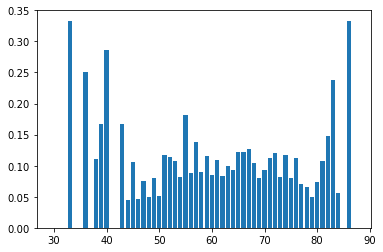

In [14]:
age = df_hospital_AB[['startage','patient_died_dummy']]
age = age.groupby('startage').mean()
age = age.reset_index()
plt.bar(age['startage'],age['patient_died_dummy'])
plt.show()

Impact of age on mortality rate is minimal from the average age of patients across hospitals and similar mortality rates across different age groups

Thus, the difference in mortality rate of hospitals A and B is under-estimated, due to the impact of gender on mortality rate, overall distribution of female patients and overall mortality rate at A and B.

(c)

As the mortality rate is effected by gender and age as seen previously, addition of these variables will get us closer to a more accurate regression-

In [19]:
model_3 = smf.ols(formula = 'patient_died_dummy ~ hospital_id + female_dummy + startage',
                data = df_hospital_AB)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:     patient_died_dummy   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     147.6
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           1.43e-92
Time:                        22:05:03   Log-Likelihood:                -1232.8
No. Observations:                6611   AIC:                             2474.
Df Residuals:                    6607   BIC:                             2501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1165      0.027  

From above, we observe that the mortality rate of hospital B is higher than hospital A by 0.0114 units, holiding all other variables constant. But in the previous regression, this difference was just 0.0072. So, we observe that by including the these control variables (female_dummy and startage), we are closer to a causal estimate. The mortality mortality rate difference also increased by 0.0114 - 0.0072 = 0.0042 units

## 2 Demand estimation

### Question 1

In [20]:
##loading demand_data.csv

In [21]:
df_demand_data = pd.read_csv('demand_data.csv')
df_demand_data.columns

Index(['vendor_id', 'week', 'summer_dummy', 'price', 'sales'], dtype='object')

In [22]:
df_demand_data['vendor_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

Regression of Sales on Price

In [24]:
df_demand_data_1 = df_demand_data[df_demand_data['vendor_id'] == 1]

model_4 = smf.ols(formula = 'sales ~ price',
                data = df_demand_data_1)
result_2 = model_4.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3250
Date:                Wed, 02 Feb 2022   Prob (F-statistic):              0.571
Time:                        22:19:57   Log-Likelihood:                -360.33
No. Observations:                  52   AIC:                             724.7
Df Residuals:                      50   BIC:                             728.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8983.8227    145.437     61.771      0.0

Regression of Sales on Price and Summer Dummy

In [25]:
model_5 = smf.ols(formula = 'sales ~ price + summer_dummy',
                data = df_demand_data_1)
result_5 = model_5.fit()
print(result_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     11.42
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           8.49e-05
Time:                        22:19:59   Log-Likelihood:                -350.56
No. Observations:                  52   AIC:                             707.1
Df Residuals:                      49   BIC:                             713.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9177.5500    128.432     71.458   

This is because of the omitted variable bias : 
$$E(\hat{\beta_1}) = \beta_1 + \beta_2 \frac{Cov(X_1,X_2)}{Var(X_1)}$$

$X_1$ is the price and $X_2$ is the summer dummy. Also, since $\beta_{2} = 358.5012$, $Cov(X_1,X_2)$ can be calculated as follows:

In [20]:
np.cov(df_demand_data_1['price'],df_demand_data_1['summer_dummy'])

array([[0.41553544, 0.12745098],
       [0.12745098, 0.19117647]])

From above, we observe that the correlation between price and summer dummy is 0.127 which is positive. 
<br>Thus we can conclude that $\hat{\beta_1}$ calculated in the first regression (sales on price) will be overestimated. When summer_dummy is included into regression, $\beta_1$ turned out to be -141.18 instead of -31.23 in earlier case. The coefficient -141.18 will be the true effect of price on sales in case there are no ommitted variables correlated with the price

### Question 2

Regression 1 on Sales on Price

In [21]:
df_demand_data_2 = df_demand_data[df_demand_data['vendor_id'] == 2]

model_6 = smf.ols(formula = 'sales ~ price',
                data = df_demand_data_2)
result = model_6.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     7.684
Date:                Wed, 02 Feb 2022   Prob (F-statistic):            0.00781
Time:                        15:57:52   Log-Likelihood:                -359.10
No. Observations:                  52   AIC:                             722.2
Df Residuals:                      50   BIC:                             726.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8411.1748    219.545     38.312      0.0

Regression 2 on Sales on Price and Summer Dummy

In [22]:
model_7 = smf.ols(formula = 'sales ~ price + summer_dummy',
                data = df_demand_data_2)
result_7 = model_7.fit()
print(result_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     7.684
Date:                Wed, 02 Feb 2022   Prob (F-statistic):            0.00781
Time:                        15:57:53   Log-Likelihood:                -359.10
No. Observations:                  52   AIC:                             722.2
Df Residuals:                      50   BIC:                             726.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2105.3159     29.848     70.534   

The matrix is singular because of a very high Cond.No. (4.08e+16) and very small eigen value of 2.75e-31. This arises from the multicollinearity. There's a high chance of intercorrelations among two or more independent variables in the model.

 Let's examine correlation between price and summer_dummy

In [23]:
np.corrcoef(df_demand_data_2['price'],df_demand_data_2['summer_dummy'])

array([[1., 1.],
       [1., 1.]])

Since the correlation between price and summer_dummy is 1 which indicates perfect collinearity, the model suffers from multicollinearity issue.

### Question 3

In case the vendors did not systematically charge higher or lower prices in summer, there wouldn't be any correlation between prices and summer_dummy vaiables. Thus when we run two regressions - one with price and sales , another with only price as independent variables, since price and dummy are not correlated, the coefficient estimate for price will not change in both these regressions. There will be no omitted variable bias here. But when we add summer dummy, there will be an improvement in precision. 